In [20]:
#Combines based on the assumption that they're exported at same time
#and therefore have same number suffix

#ie DCM00001 pairs with ECM000001

import glob 
import pydicom 
import numpy as np 
import os 

import glob
import pydicom
import numpy as np
import os 


ecm_path = 'ecm_to_combine'
dcm_path = 'dcm_to_combine'

output_path = 'combined_images'

if not os.path.exists(output_path):
    os.mkdir(output_path) 

ecm_files = glob.glob(ecm_path + '/*') 
dcm_files = glob.glob(dcm_path + '/*')

#Info for Siemens IMPACT C
OFFSET = 20480
ROWS = 3070
COLS = 3070

for ecm, dcm in zip(ecm_files, dcm_files):
    with open(ecm, mode='rb') as f:
        pixel_data = np.fromfile(f, dtype=np.uint16, count=ROWS*COLS, offset=OFFSET).reshape((ROWS, COLS), order='C')

    dcm_im = pydicom.dcmread(dcm)

    dcm_im.PixelData = pixel_data.tobytes() 
    dcm_im.Rows, dcm_im.Columns = pixel_data.shape 
    dcm_im.PresentationIntentType = "RONAN_FIX" 
    
    save_path = output_path + '/' + os.path.basename(dcm) + '-RAW.dcm' 
    dcm_im.save_as(save_path)



In [17]:
test_dcm = pydicom.dcmread(dcm_files[0])
test_ecm = ecm_files[0]

with open(test_ecm, mode='rb') as f:
    pixel_data = np.fromfile(f, dtype=np.uint16, count=ROWS*COLS, offset=OFFSET).reshape((ROWS, COLS), order='C')

test_dcm.PixelData = pixel_data.tobytes()
test_dcm.Rows, test_dcm.Columns = pixel_data.shape
test_dcm.PresentationIntentType = "RONAN_FIX"
test_dcm.save_as('im1-test.dcm')

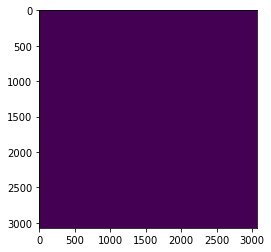